In [ ]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.plots import corner
from mejiro.utils import util

# read configuration file
with open('roman_test.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 2318 pickle(s) in /data/bwedig/mejiro/roman_test_dev/03


In [4]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

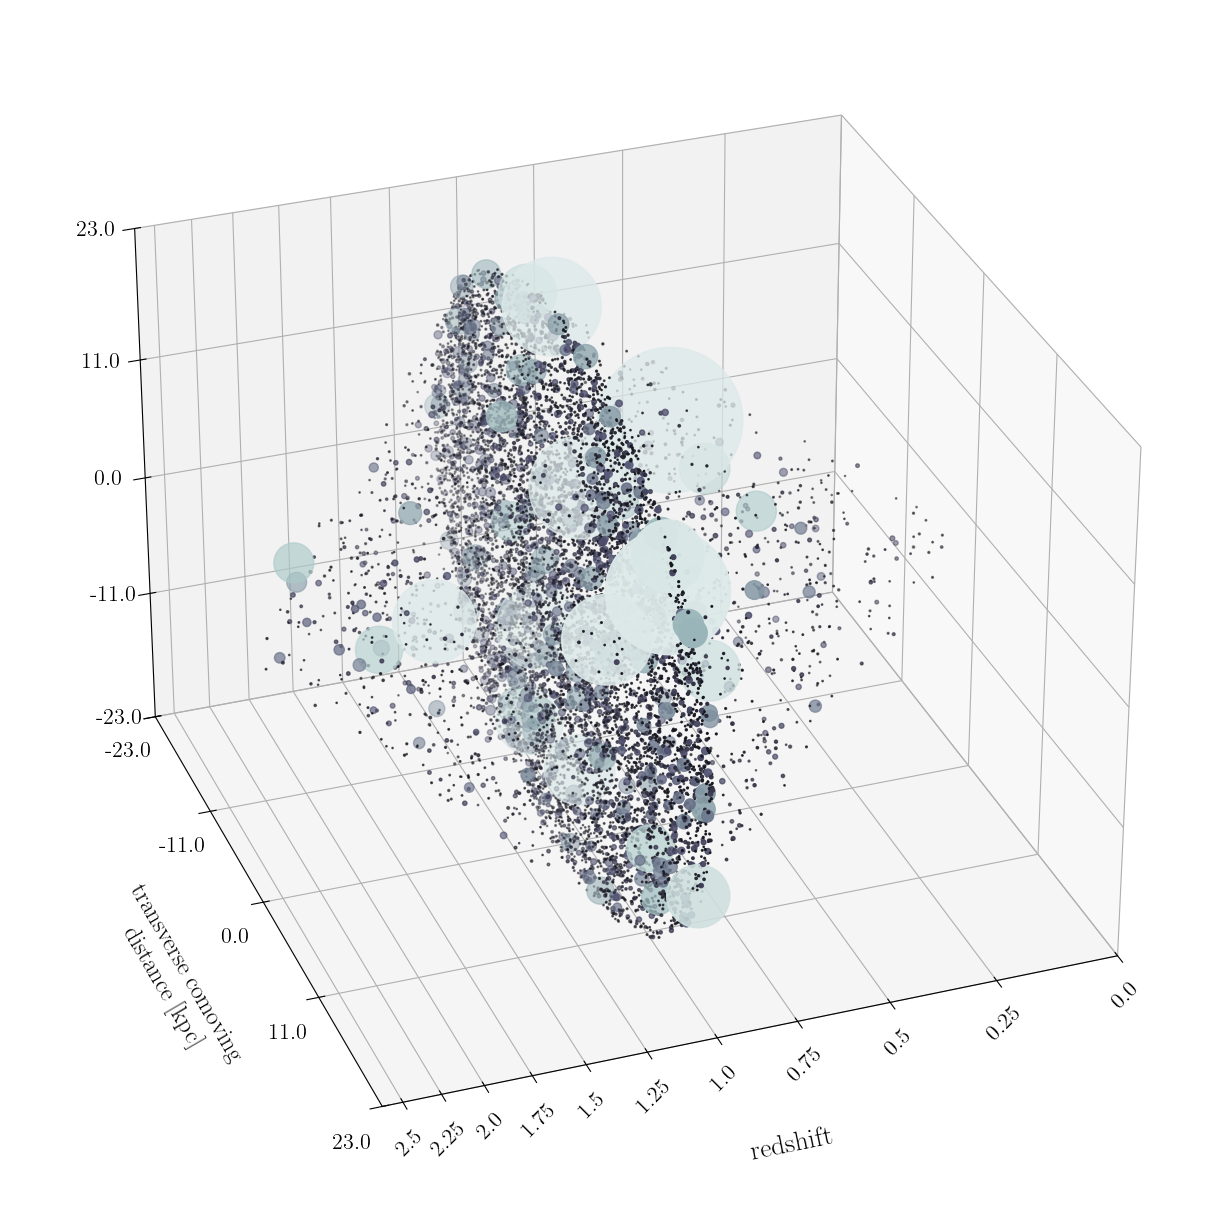

In [5]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

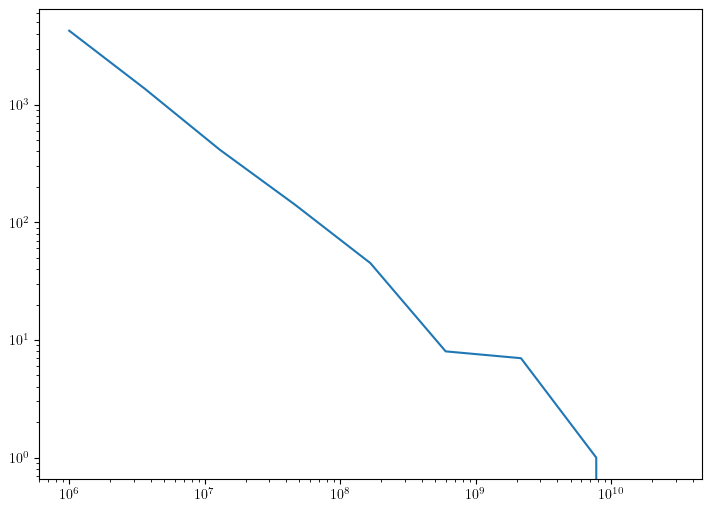

In [6]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.show()

In [7]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 1.45e+10 Msun

{'_args': {},
 '_c': 8.70070057227369,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7fc54bba7100>,
 '_kwargs_lenstronomy': [{'Rs': 0.5782939787,
                          'alpha_Rs': 0.0156560148,
                          'center_x': 0.1779,
                          'center_y': 1.2194,
                          'r_trunc': 7.9871764266582375}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7fc54d5e3970>,
 '_nfw_params': [9766199.853226898, 4.411442129094583, 38.382637057165496],
 '_profile_args': (8.70070057227369, 60.92863844185811),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationRN object at 0x7fc54bba7490>,
 '_zeval': 0.77,
 'fixed_position': False,
 'is_subhalo': False,
 'lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7fc54d5e3970>,
 'mass': 14490035373.836666,
 'mdef': 'TNFW',
 'r3d': None,
 'tnfw_lenstronomy':

In [8]:
lenses = util.unpickle_all(os.path.join(data_dir, 'sca*'), prefix="lens_")
print(f'Found {len(lenses)} lens(es) in {data_dir}')

Found 4661 lens(es) in /data/bwedig/mejiro/roman_test_dev/03


In [9]:
failed_lenses = util.unpickle_all(data_dir, prefix="failed_")
print(f'{len(failed_lenses)} failed out of {len(lenses)} systems, {len(failed_lenses) / len(lenses) * 100:.2f} percent')

26 failed out of 4661 systems, 0.56 percent


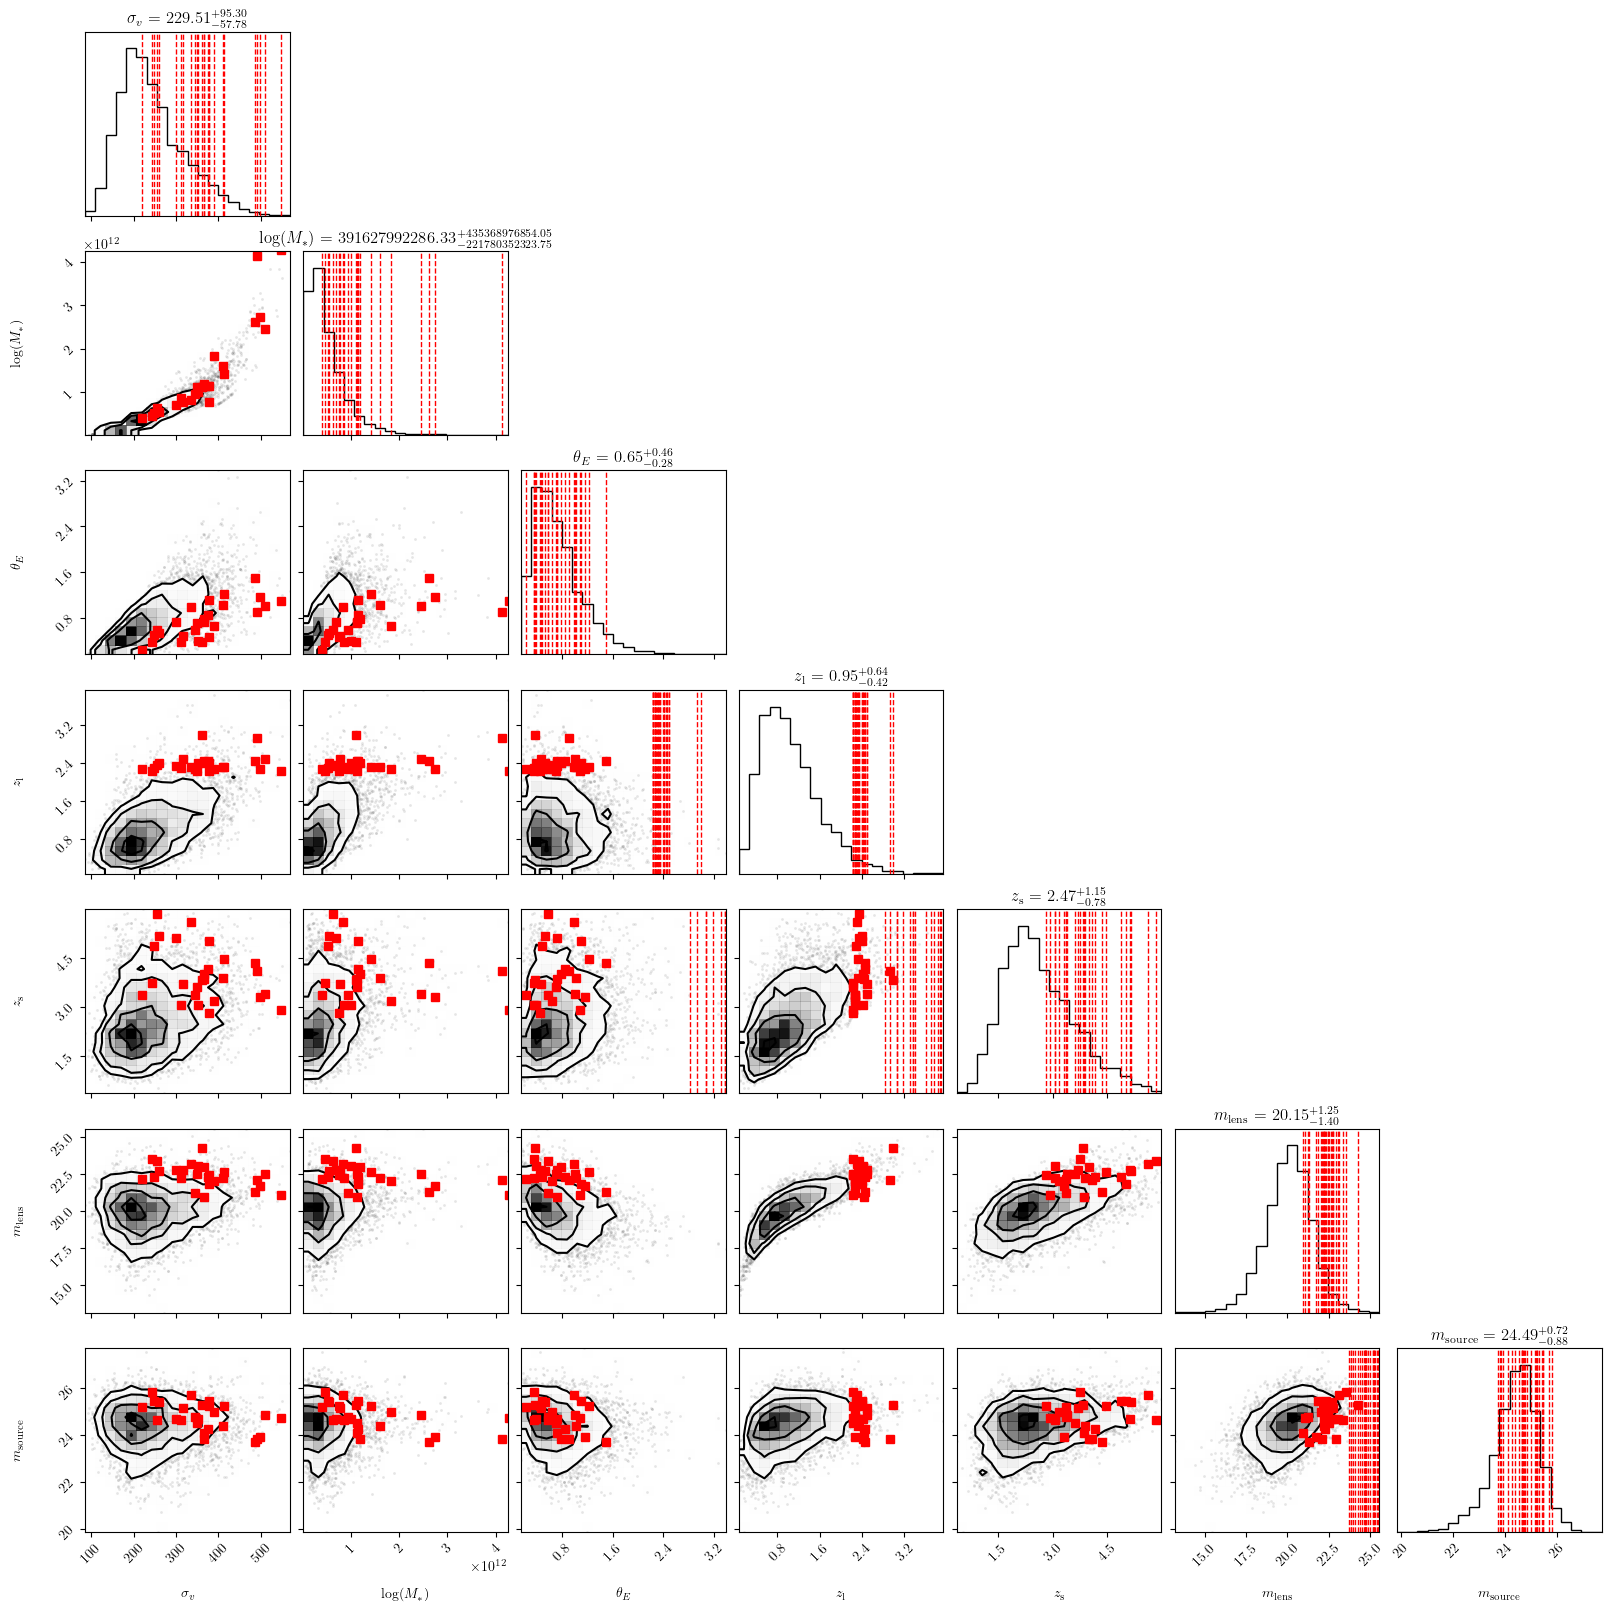

In [10]:
total_corner = corner.overview(lenses, 'F129', quantiles=None)
corner.overplot_points(total_corner, failed_lenses)